In [ ]:
import sys

sys.path.append("../..")
from pathlib import Path
from offroad_det_seg_rellis.inference import RellisPolarBevFusionInference

sequence_dir = Path("../../RELLIS/Rellis-3D/00000").resolve()
print(str(sequence_dir))
inference = RellisPolarBevFusionInference(
    "../train/checkpoints/checkpoint_last_20251221_101423.pth",
    device="cuda",
    cam_intrin_path=str(sequence_dir / "camera_info.txt"),
    lidar2cam_path=str(sequence_dir / "transforms.yaml"),
)

INFO     - 2025-12-25 20:14:42 - polar_bev_transform.py:34 - <module>() - bev_pool imported successfully
/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D/00000
{'batch_size': 4,
 'checkpoint_dir': 'checkpoints',
 'data_root': '/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D',
 'deterministic': False,
 'device': 'cuda',
 'filter_fov': True,
 'gpu_id': 0,
 'grad_check_interval': 50,
 'gradient_clip': 2.0,
 'grid_type': 'polar',
 'learning_rate': 1e-05,
 'lidar_type': 'os1',
 'log_dir': 'runs',
 'log_interval': 1,
 'loss': {'class_names': ['void',
                          'dirt',
                          'grass',
                          'tree',
                          'pole',
                          'water',
                          'sky',
                          'vehicle',
                          'object',
                          'asphalt',
                          'building',
                          'log',
                          'person',
                        

In [ ]:
from offroad_det_seg_rellis.dataset import load_sample_list
from pprint import pprint

# load the custom test list
test_list = load_sample_list("../config/split_list_test.lst")
print(len(test_list))

# group by sequence id
frame_idx_by_seq_id = {}
for seq_id, frame_idx in test_list:
    if seq_id not in frame_idx_by_seq_id:
        frame_idx_by_seq_id[seq_id] = []
    frame_idx_by_seq_id[seq_id].append(frame_idx)

pprint(frame_idx_by_seq_id)


1300
{'00000': [300,
           301,
           302,
           303,
           304,
           305,
           306,
           307,
           308,
           309,
           310,
           311,
           312,
           313,
           314,
           315,
           316,
           317,
           318,
           319,
           320,
           321,
           322,
           323,
           324,
           325,
           326,
           327,
           328,
           329,
           330,
           331,
           332,
           333,
           334,
           335,
           336,
           337,
           338,
           339,
           340,
           341,
           342,
           343,
           344,
           345,
           346,
           347,
           348,
           349,
           1200,
           1201,
           1202,
           1203,
           1204,
           1205,
           1206,
           1207,
           1208,
           1209,
           1210,
        

In [ ]:
import numpy as np

# split into chunks
seq_chunks = []
for seq_id, frame_idx_list in frame_idx_by_seq_id.items():
    tmp = np.array(frame_idx_list)
    break_points = np.argwhere(np.diff(tmp) > 1).flatten() + 1
    break_points = np.concatenate([[0], break_points, [len(tmp)]])
    for i in range(len(break_points) - 1):
        seq_chunks.append((seq_id, tmp[break_points[i] : break_points[i + 1]]))
        print(f"{seq_id} {seq_chunks[-1][1][0]}-{seq_chunks[-1][1][-1]}")

00000 300-349
00000 1200-1249
00000 1650-1699
00000 1900-1949
00000 2650-2699
00001 300-349
00001 1200-1249
00001 1650-1699
00001 1900-1949
00002 300-349
00002 1200-1249
00002 1650-1699
00002 1900-1949
00002 2650-2699
00002 3000-3049
00002 3550-3649
00002 3800-3849
00003 300-349
00003 1200-1249
00003 1650-1699
00003 1900-1949
00004 300-349
00004 1200-1249
00004 1650-1699
00004 1900-1949


/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/notebooks/../../offroad_det_seg_rellis/inference/plot_util.py:215: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


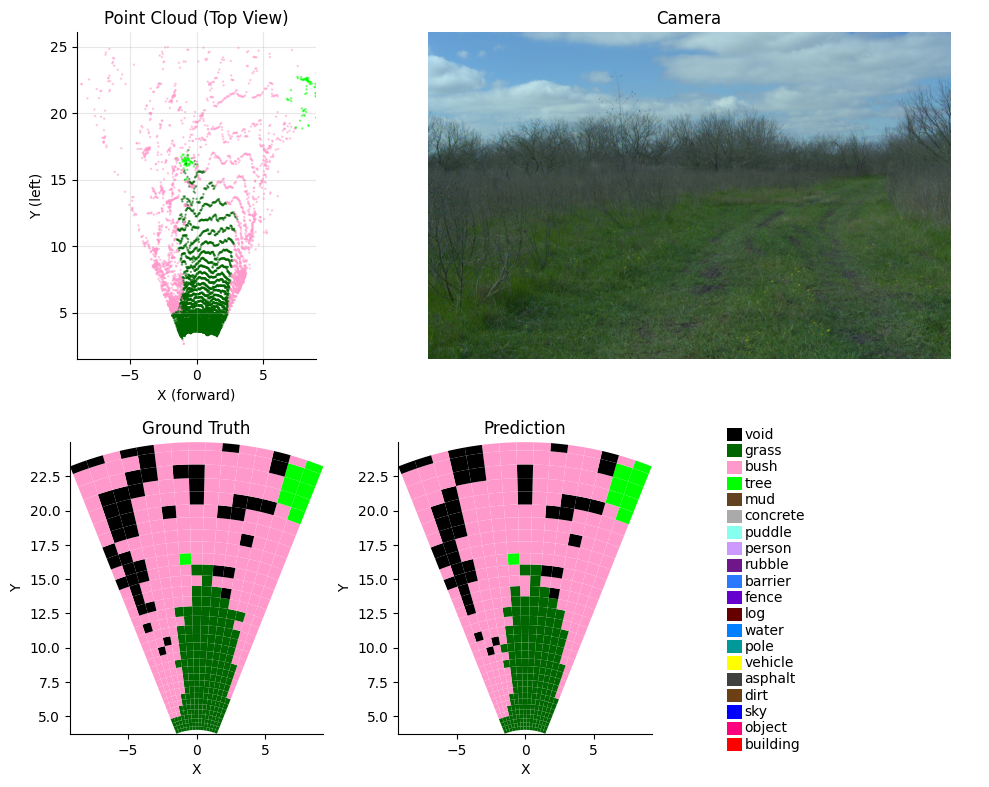

In [16]:
from offroad_det_seg_rellis.inference.plot_util import plot_prediction

fig = plot_prediction(
    inference,
    "00000",
    frame_idx=2652,
    new_figure=True,
    fig_size=(10, 8),
    show_fig=True,
)

In [17]:
from offroad_det_seg_rellis.inference.plot_util import make_prediction_movie

for seq_id, frame_idx_list in seq_chunks:
    make_prediction_movie(
        inference,
        seq_id,
        frame_idx_list,
        out_dir="/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie",
        frame_rate=5,
    )

Processing frame 1/50 (2.0%): frame_idx=300
Processing frame 2/50 (4.0%): frame_idx=301
Processing frame 3/50 (6.0%): frame_idx=302
Processing frame 4/50 (8.0%): frame_idx=303
Processing frame 5/50 (10.0%): frame_idx=304
Processing frame 6/50 (12.0%): frame_idx=305
Processing frame 7/50 (14.0%): frame_idx=306
Processing frame 8/50 (16.0%): frame_idx=307
Processing frame 9/50 (18.0%): frame_idx=308
Processing frame 10/50 (20.0%): frame_idx=309
Processing frame 11/50 (22.0%): frame_idx=310
Processing frame 12/50 (24.0%): frame_idx=311
Processing frame 13/50 (26.0%): frame_idx=312
Processing frame 14/50 (28.0%): frame_idx=313
Processing frame 15/50 (30.0%): frame_idx=314
Processing frame 16/50 (32.0%): frame_idx=315
Processing frame 17/50 (34.0%): frame_idx=316
Processing frame 18/50 (36.0%): frame_idx=317
Processing frame 19/50 (38.0%): frame_idx=318
Processing frame 20/50 (40.0%): frame_idx=319
Processing frame 21/50 (42.0%): frame_idx=320
Processing frame 22/50 (44.0%): frame_idx=321
P

In [18]:
from offroad_det_seg_rellis.inference.plot_util import change_video_frame_rate

change_video_frame_rate(
    "/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie",
    new_frame_rate=3,
    overwrite=True,
)

Processing [1/25]: 00000_1200-1249.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00000_1200-1249.mp4 (50 frames)
Processing [2/25]: 00000_1650-1699.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00000_1650-1699.mp4 (50 frames)
Processing [3/25]: 00000_1900-1949.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00000_1900-1949.mp4 (50 frames)
Processing [4/25]: 00000_2650-2699.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps
  ✓ Overwritten: 00000_2650-2699.mp4 (50 frames)
Processing [5/25]: 00000_300-349.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00000_300-349.mp4 (50 frames)
Processing [6/25]: 00001_1200-1249.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00001_1200-1249.mp4 (50 frames)
Processing [7/25]: 00001_1650-1699.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00001_1650-1699.mp4 (50 frames)
Processing [8/25]: 00001_1900-1949.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00001_1900-1949.mp4 (50 frames)
Processing [9/25]: 00001_300-349.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00001_300-349.mp4 (50 frames)
Processing [10/25]: 00002_1200-1249.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_1200-1249.mp4 (50 frames)
Processing [11/25]: 00002_1650-1699.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_1650-1699.mp4 (50 frames)
Processing [12/25]: 00002_1900-1949.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_1900-1949.mp4 (50 frames)
Processing [13/25]: 00002_2650-2699.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_2650-2699.mp4 (50 frames)
Processing [14/25]: 00002_300-349.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_300-349.mp4 (50 frames)
Processing [15/25]: 00002_3000-3049.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_3000-3049.mp4 (50 frames)
Processing [16/25]: 00002_3550-3649.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_3550-3649.mp4 (100 frames)
Processing [17/25]: 00002_3800-3849.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00002_3800-3849.mp4 (50 frames)
Processing [18/25]: 00003_1200-1249.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00003_1200-1249.mp4 (50 frames)
Processing [19/25]: 00003_1650-1699.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00003_1650-1699.mp4 (50 frames)
Processing [20/25]: 00003_1900-1949.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00003_1900-1949.mp4 (50 frames)
Processing [21/25]: 00003_300-349.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00003_300-349.mp4 (50 frames)
Processing [22/25]: 00004_1200-1249.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00004_1200-1249.mp4 (50 frames)
Processing [23/25]: 00004_1650-1699.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00004_1650-1699.mp4 (50 frames)
Processing [24/25]: 00004_1900-1949.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00004_1900-1949.mp4 (50 frames)
Processing [25/25]: 00004_300-349.mp4
  Original: 1000x800 @ 5.00 fps
  New: 1000x800 @ 3.00 fps


OpenCV: FFMPEG: tag 0x34504d46/'FMP4' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  ✓ Overwritten: 00004_300-349.mp4 (50 frames)

Processed 25 video file(s)


[PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00000_1200-1249.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00000_1650-1699.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00000_1900-1949.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00000_2650-2699.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00000_300-349.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00001_1200-1249.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00001_1650-1699.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00001_1900-1949.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00001_300-349.mp4'),
 PosixPath('/home/ji-liu/GitHub/off_road_nav/offroad_det_seg_rellis/movie/00002_1200-1249.mp4'),
 PosixPath('/home/ji-liu/GitHub/of